In [1]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.
/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Variational autoencoder.

In [3]:
# Create the autoencoder.
vae = ngdlutils.build_dense_vae(input_shape=(28, 28), latent_dim=2, hidden_units=[512])
vae.compile(optimizer='adadelta', loss="binary_crossentropy")
vae.summary()

# Train.
print("Train...")
history = vae.fit(
        x_input_train, x_input_train,
        epochs=100,
        batch_size=32,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = vae.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

Encoder:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      reshape_1[0][0]                  
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z

Epoch 43/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.2008 - val_loss: 0.2020
Epoch 44/100
60000/60000 [==============================] - 21s 352us/step - loss: 0.2005 - val_loss: 0.2013
Epoch 45/100
60000/60000 [==============================] - 21s 346us/step - loss: 0.2001 - val_loss: 0.2013
Epoch 46/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.1998 - val_loss: 0.2008
Epoch 47/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.1995 - val_loss: 0.2005
Epoch 48/100
60000/60000 [==============================] - 21s 347us/step - loss: 0.1991 - val_loss: 0.2004
Epoch 49/100
60000/60000 [==============================] - 21s 346us/step - loss: 0.1988 - val_loss: 0.2002
Epoch 50/100
60000/60000 [==============================] - 21s 351us/step - loss: 0.1985 - val_loss: 0.1999
Epoch 51/100
60000/60000 [==============================] - 21s 346us/step - loss: 0.1982 - val_loss: 0.2000
Epoch 52/100
60000/

# Visualizing variational autoencoder.

Rendering history...


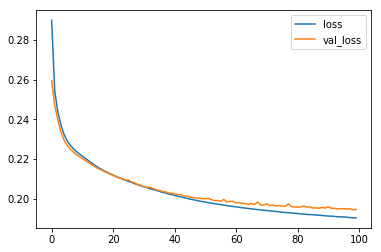

Rendering reconstructions...


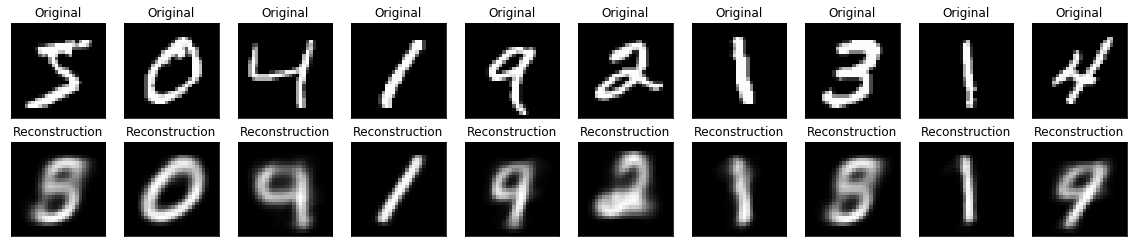

Rendering latent-space...


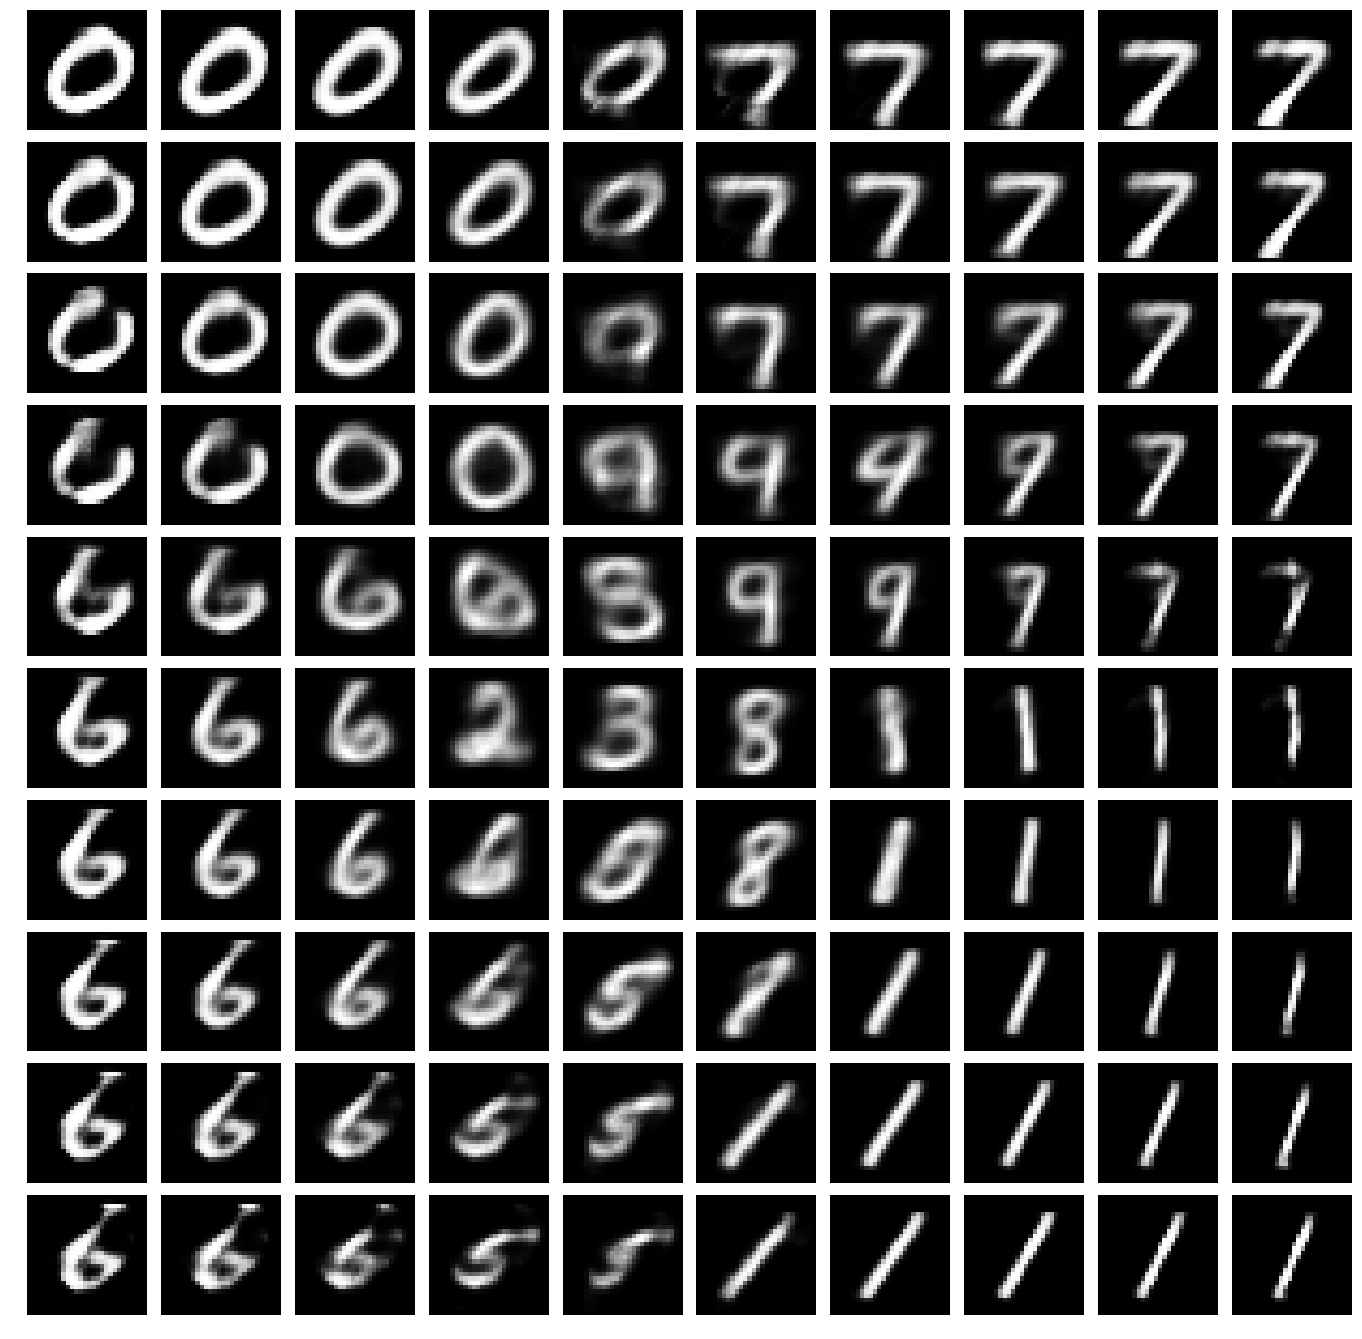

Rendering encodings...


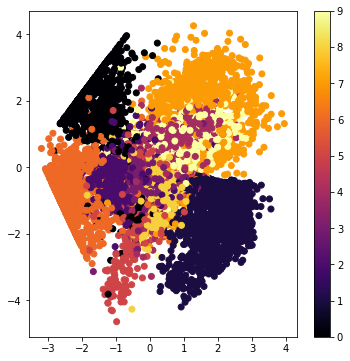

In [4]:
print("Rendering history...")
ngdlutils.render_history(history)

print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10])

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(vae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(vae.encoder, x_input_test, y_output_test)